# Feed forward neural network

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# hyper parameters
input_size = 784 #28x28
hidden_size = 100
num_classes = 10 #classify from digits 0 to 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [3]:
#MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False,transform=transforms.ToTensor())

In [4]:
# DataLoader object
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [5]:
# let's check the batch in loader object
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


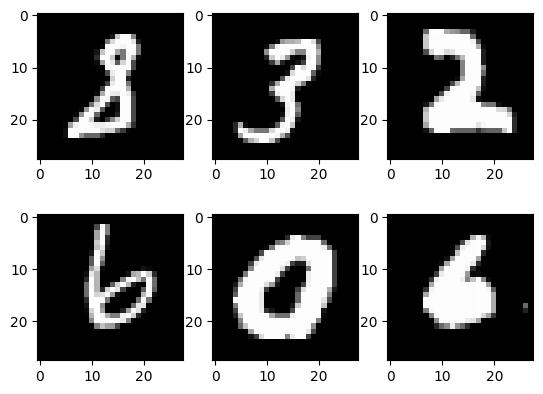

In [6]:
# plotting
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')

plt.show()

In [7]:
# classify these handwritten digits
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size) #1st layer
        self.relu = nn.ReLU() #activation function
        self.l2 = nn.Linear(hidden_size, num_classes) #last layer 
        
    def forward(self, x):
        out = self.l1(x) 
        out = self.relu(out)
        out = self.l2(out) #last layer doesnot have activation because nn.CrossEntropyLoss() has activation Softmax already added to it 
        return out
    
# creating NeuralNet object
model = NeuralNet(input_size, hidden_size, num_classes)

In [8]:
# loss and optimizer
criterion = nn.CrossEntropyLoss() #<-- for multiclass 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [9]:
# training loop
n_total_steps = len(train_loader) # total iteration for complete training sample

for epoch in range(num_epochs):
    # iterations(batch) in each epoch
    for i, (images, labels) in enumerate(train_loader):#for each loop,train_loader feeds 100samples
        images = images.reshape(-1, 28*28)
        labels = labels
        
        
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backwards
        optimizer.zero_grad() # empty any computational grad
        loss.backward() #backward pass
        optimizer.step()
        
        if(i+1)%100 ==0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

epoch 1 / 2, step 100/600, loss = 0.5407
epoch 1 / 2, step 200/600, loss = 0.3151
epoch 1 / 2, step 300/600, loss = 0.2860
epoch 1 / 2, step 400/600, loss = 0.2957
epoch 1 / 2, step 500/600, loss = 0.2650
epoch 1 / 2, step 600/600, loss = 0.2501
epoch 2 / 2, step 100/600, loss = 0.3081
epoch 2 / 2, step 200/600, loss = 0.2623
epoch 2 / 2, step 300/600, loss = 0.3657
epoch 2 / 2, step 400/600, loss = 0.1395
epoch 2 / 2, step 500/600, loss = 0.1614
epoch 2 / 2, step 600/600, loss = 0.1992


In [13]:
# test and evaluation
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader: #each loop contains 100 test samples
        images = images.reshape(-1, 28*28)
        labels = labels
        
        # forward pass / prediction
        outputs = model(images)

        # actual prediction
        # value, index
        _, predictions = torch.max(outputs, 1) # multiclass pred
        n_samples += labels.shape[0]
        n_correct += (predictions==labels).sum().item()
        
    acc = 100.0 * n_correct / n_samples
    print(acc)

95.24
